In [1]:
import matplotlib.pyplot as plt
import numpy as np
from lmfit.models import LinearModel
import pandas as pd

#Orthogonal channels: 0  1  2  3  4  5  6  7 
#                     8  9  10 11 12 13 14 15  

#Ok couples: 0-8, 2-10, 3-11, 7-15


In [2]:
PATH = "../Dati/30-04/Run_chall_Na_data_Measurements_Only_4_30_2024.dat"

 
try:
    # Assuming data is in a structured format like CSV or similar
    df = pd.read_csv(PATH, comment = "=", usecols = [0, 1, 4, 5],
                     names = ("Ch_Nb", "EvID", "Charge", "LEdge"),
                     header = None, delim_whitespace = True)
    # Process the DataFrame
    print(df)
 
except FileNotFoundError:
    print(f"File '{PATH}' not found.")
except Exception as e:
    print(f"An error occurred: {e}")

/var/folders/0y/k6xzqpg904jd8jnjbgq30b4w0000gn/T/ipykernel_2874/2493304013.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(PATH, comment = "=", usecols = [0, 1, 4, 5],


          Ch_Nb  EvID   Charge     LEdge
0             0     1   -1.806  1676.739
1             2     1   -4.085  1333.858
2             3     1   -6.692   963.534
3             4     1 -332.808   552.179
4             5     1   -5.529  1386.652
...         ...   ...      ...       ...
10999995      8    64   -7.291   115.184
10999996     10    64   16.458     4.029
10999997     11    64   -6.958  1871.864
10999998     14    64  -11.191   861.484
10999999     15    64  -35.038  1462.715

[11000000 rows x 4 columns]


In [68]:
pC_to_eV = 662 / np.array([-311.8, -337.2, -957.4, -1467.7, -1533.3, 
                     -1695.9, -1143.8, -386.1, -551.3, -530.1, -801.4])

grouped = df.groupby(df.index // 11)

times = []
for group_name, group_data in grouped:
    energies = group_data["Charge"].to_numpy() * pC_to_eV
    ledges   = group_data["LEdge"].to_numpy()
    Na = np.logical_and(energies < 1276 * 1.05, energies > 1276 * 0.95)

    if(Na.sum() == 1):
        ee = np.logical_and(energies < 511 * 1.05, energies > 511 * 0.95)
        if(ee.sum() in [1, 2]):
            times.append(ledges[ee].mean() - ledges[Na][0])
            
        else:
            continue

    else:
        continue





9369
11632
15950
30831
31379
31491
48739
58296
64745
76996
77448
78573
81738
81816
86619
93475
132478
149257
155558
178489
185644
187962
190164
199731
202347
212711
233202
250788
279638
285676
290321
291535
306628
306950
307095
336071
347111
352600
353277
373651
391450
393784
399422
400272
401841
408540


KeyboardInterrupt: 

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  1.,  4.,  8., 60., 45.,  8.,  2.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([-989.083  , -937.58122, -886.07944, -834.57766, -783.07588,
        -731.5741 , -680.07232, -628.57054, -577.06876, -525.56698,
        -474.0652 , -422.56342, -371.06164, -319.55986, -268.05808,
        -216.5563 , -165.05452, -113.55274,  -62.05096,  -10.54918,
          40.9526 ,   92.45438,  143.95616,  195.45794,  246.95972,
         298.4615 ,  349.96328,  401.46506,  452.96684,  504.46862,
         555.9704 ,  607.47218,  658.97396,  710.47574,  761.97752,
         813.4793 ,  864.98108,  916.48286,  967.98464, 1019.48642,
        1070.9882 , 1122.48998, 1173.99176, 1225.49354, 1276.99532,
        1328.4971 , 1379.99888, 1431.50066, 1483.00244, 1534.50422,
        1586.006  ]),
 <BarContainer

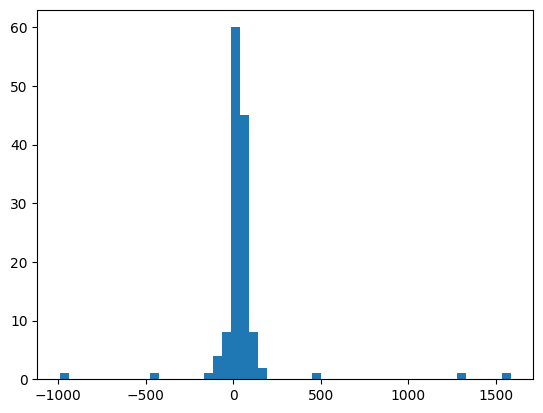

In [43]:
plt.hist(times, bins = 50)

In [29]:
m = np.array([1, 2, 3, 4, 5, 6])
np.logical_and(m < 4, m > 2)

array([False, False,  True, False, False, False])

In [33]:
m[np.logical_and(m < 4, m > 2)][0]

3

In [46]:
times[3]

-3.715000000000032

In [69]:
print(grouped.get_group(30830))


        Ch_Nb  EvID   Charge     LEdge
339130      0   111   -1.434   297.252
339131      2   111    9.122  1380.214
339132      3   111    4.596   633.347
339133      4   111    4.289  1195.319
339134      5   111   -1.210  1127.814
339135      7   111  -10.943   183.988
339136      8   111    8.984  1349.782
339137     10   111 -726.178   393.475
339138     11   111 -442.533   389.760
339139     14   111   -7.440   407.436
339140     15   111    4.414  1804.477


In [71]:
x = grouped.get_group(30830)["Charge"].to_numpy() * pC_to_eV
np.logical_and(x < 1276 * 1.05, x > 1276 * 0.95)

array([False, False, False, False, False, False, False,  True, False,
       False, False])

In [72]:
np.logical_and(x < 511 * 1.05, x > 511 * 0.95)

array([False, False, False, False, False, False, False, False,  True,
       False, False])

In [ ]:
energies = group_data["Charge"].to_numpy() * pC_to_eV
ledges   = group_data["LEdge"].to_numpy()
Na = np.logical_and(energies < 1276 * 1.05, energies > 1276 * 0.95)
if(i % 5000 == 0 ):
    print(i)
i = i + 1
if(Na.sum() == 1):
    ee = np.logical_and(energies < 511 * 1.05, energies > 511 * 0.95)
    if(ee.sum() in [1, 2]):
        times.append(ledges[ee].mean() - ledges[Na][0])